<h1>Density Projections</h1>

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
mp = 1.672622e-24 # mass of hydrogren atom, in grams
kb = 1.380658e-16 # boltzmann constant in ergs/K

In [6]:
dnamein='./hdf5/' # directory where the file is located
dnameout='./png/' # directory where the plot will be saved

In [7]:
f = h5py.File('200_512_f32.h5', 'r') # open the hdf5 file for reading
head = f.attrs # read the header attributes into a structure, called head

In [8]:
head.keys()

<KeysViewHDF5 ['density_unit', 'dims', 'dt', 'dx', 'energy_unit', 'gamma', 'length_unit', 'mass_unit', 'n_fields', 'n_step', 't', 'time_unit', 'velocity_unit']>

In [9]:
f.keys()

<KeysViewHDF5 ['Energy', 'GasEnergy', 'density', 'momentum_x', 'momentum_y', 'momentum_z']>

In [10]:
gamma = head['gamma'] # ratio of specific heats
t  = head['t'] # time of this snapshot, in kyr
nx = head['dims'][0] # number of cells in the x direction
ny = head['dims'][1] # number of cells in the y direction
nz = head['dims'][2] # number of cells in the z direction
dx = head['dx'][0] # width of cell in x direction
dy = head['dx'][1] # width of cell in y direction
dz = head['dx'][2] # width of cell in z direction
l_c = head['length_unit']
t_c = head['time_unit']
m_c = head['mass_unit']
d_c = head['density_unit']                 
v_c = head['velocity_unit']
e_c = head['energy_unit']
p_c = e_c # pressure units are the same as energy density units, density*velocity^2/length^3

In [11]:
d = f['density'][:]

In [12]:
f.close()

In [13]:
mu = 1.0 # mean molecular weight (mu) of 1

d = d*d_c # to convert from code units to cgs, multiply by the code unit for that variable
n = d/(mu*mp) # number density, particles per cm^3

In [14]:
print("n range    = %e %e" % (np.min(n),np.max(n)))

n range    = 5.926918e-04 2.921435e+02


In [26]:
n_x = np.sum(n, axis=0)*dx*l_c
n_y = np.sum(n, axis=1)*dx*l_c
n_z = np.sum(n, axis=2)*dx*l_c

In [38]:
log_n_x = np.log10(n_x)
log_n_y = np.log10(n_y)
log_n_z = np.log10(n_z)

In [41]:
print(np.min(log_n_x), np.max(log_n_x))
print(np.min(log_n_y), np.max(log_n_y))
print(np.min(log_n_z), np.max(log_n_z))

18.235505973160226 20.695264658271164
17.560637431015913 20.649341128231843
17.574527520263647 20.755672066646174


In [50]:
n_min = 17.5
n_max = 21.0

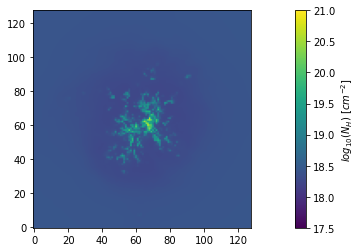

In [51]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(log_n_x.T, origin='lower', cmap='viridis', vmin=n_min, vmax=n_max)
cb = plt.colorbar(image, ticks=np.arange(n_min, n_max+0.5, 0.5), label='$log_{10}(N_{H})$ [$cm^{-2}$]')
plt.show()

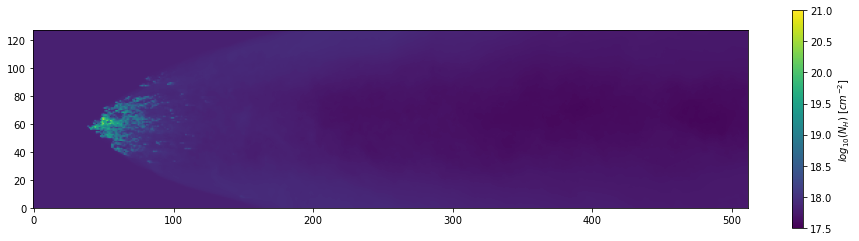

In [52]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(log_n_y.T, origin='lower', cmap='viridis', vmin=n_min, vmax=n_max)
cb = plt.colorbar(image, ticks=np.arange(n_min, n_max+0.5, 0.5), label='$log_{10}(N_{H})$ [$cm^{-2}$]')
plt.show()

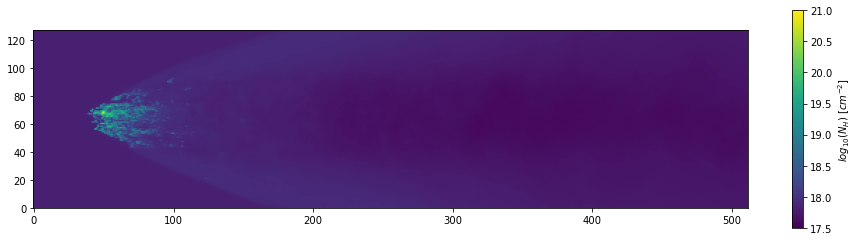

In [53]:
fig = plt.figure(figsize=(16,4))
image = plt.imshow(log_n_z.T, origin='lower', cmap='viridis', vmin=n_min, vmax=n_max)
cb = plt.colorbar(image, ticks=np.arange(n_min, n_max+0.5, 0.5), label='$log_{10}(N_{H})$ [$cm^{-2}$]')
plt.show()